##A3: Unsupervised learning with t-NSE

Dataset: winequality-red.txt || https://archive.ics.uci.edu/dataset/186/wine+quality

t-SNE (T-distributed Stochastic Neighbor Embedding) is an algorithm designed for the visualization of high-dimensional datasets.

t-SNE is executed in two steps:

1- probability distribution over pairs of samples in the original space, so that similar samples receive a high probability of being chosen, while very different samples receive a low probability of being chosen.

2 - Bring the points from high-dimensional space to low-dimensional space randomly, define a probability distribution similar to the one seen in the target space (the low-dimensional space).


# Import modules

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [2]:
# Load training data
filename = '/content/winequality_red.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  


# Standardize the data

In [4]:
features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target = ["quality"]

# Separating out the features
#x = df.loc[:, features].values
x = df.loc[:, features].to_numpy()

# Separating out the target (class)
#y = df.loc[:, target].values
y = df.loc[:, target].to_numpy()

# Standardizing the features
x = StandardScaler().fit_transform(x)

# t-SNE Projection to 2D

Using Principal component analysis, in our case original data with 4 columns, reduce it onto a two dimensional space.

In [5]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_result = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print("original shape:   ", x.shape)
print("transformed shape:", tsne_result.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.007s...
[t-SNE] Computed neighbors for 1599 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 0.856448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.974380
[t-SNE] KL divergence after 1000 iterations: 1.003034
t-SNE done! Time elapsed: 14.21012568473816 seconds
original shape:    (1599, 11)
transformed shape: (1599, 2)


# Visualize 2D Projection

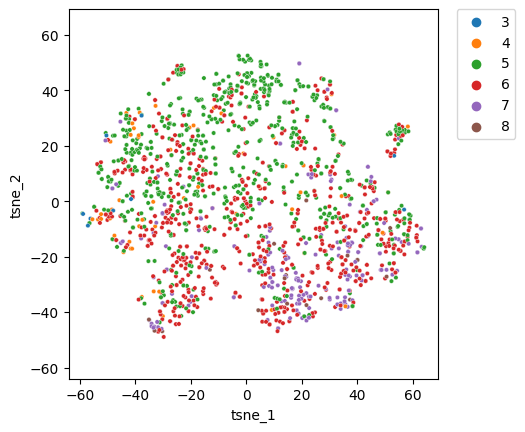

In [6]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'class': y[:,0]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='class', data=tsne_result_df, ax=ax,s=10, palette=sns.color_palette(n_colors=6))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()